# EDA of train dataset

This notebook aims to review all the images in the training dataset and identify those that are either misfits, incorrectly labelled, or have pecularities that need a second look. This notebook also serves to identify large groups of images that are more closely related and thus inform the modelling decisions. 

Imports and data setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TRAIN_DATA = '../data/training.csv'
TEST_DATA = '../data/test.csv'

In [3]:
df_train = pd.read_csv(TRAIN_DATA)
df_test = pd.read_csv(TEST_DATA)

In [12]:
Y = np.array(df_train[df_train.columns.difference(['Image'])])
X = df_train['Image']

img_vec_len = 96*96                                              # images pixel grid size
keypoints_num = 30                                               # maximum total keypoints for an image


imgArray = np.zeros((X.shape[0], img_vec_len), dtype=int)       # temporary array to save each image as numpy array

idx=0
for i in X.keys(): 
    imgArray[idx] = np.fromstring(X[i], dtype=int, sep=' ')
    idx = idx + 1
X = imgArray
print("Total images in train dataset: ", X.shape[0])

Total images in train dataset:  7049


Function to subplot a group of images, and label the ones with missing keypoints distinctly

In [5]:
def plot_images(images, points, type='actual', subplotting=False, gridRows=0, gridCols=0, imageIndices=1 ):
    
    global image_num
    global keypoints_num
    
    plt.figure(figsize=(16,16))    
    img_nums = images.shape[0]
    points_nums = points.shape[0]
    
    if ( ( img_nums != points_nums) | ( img_nums != imageIndices.shape[0] ) ):
        raise ValueError("Mismatch in number of images and keypoints' rows passed to plot_images().")
    
    
    for thisImg in range(0, imageIndices.shape[0]):
        
        if( subplotting==True ):
            plt.subplot(gridRows, gridCols, thisImg + 1)
            noKeypNums  = np.isnan(points[thisImg]).sum()
            
            if( noKeypNums == 0 ):                                                            # no missing keypoints (group1)
                plt.title("#: " + str(imageIndices[thisImg]) + 
                          ",  Points: " + str(keypoints_num - noKeypNums), color='k')         # title in black
            
            elif( ( noKeypNums > 0) & (noKeypNums < 22 ) ):                                   # (1,21) missing keypoints
                plt.title("#: " + str(imageIndices[thisImg]) + 
                          ",  Points: " + str(keypoints_num - noKeypNums), color='m')         # title in magenta
            
            elif( ( noKeypNums == 22 ) ):                                                     # 22 missing keypoints (group2)
                plt.title("#: " + str(imageIndices[thisImg]) + 
                          ",  Points: " + str(keypoints_num - noKeypNums), color='b')         # title in blue
            
            else:                                                                             # > 22 missing keypoints
                plt.title("#: " + str(imageIndices[thisImg]) + 
                          ",  Points: " + str(keypoints_num - noKeypNums), color='r')         # title in red
        
        plt.imshow(np.reshape(images[thisImg,:],(96,96)), cmap = 'gray')
        
        if( type=='actual' ):
            for x, y in np.reshape(points[thisImg],(len(points[thisImg])//2, 2)):
                plt.plot(x, y, 'rx')
        elif( type=='predicted' ):
            for x, y in np.reshape(points[thisImg],(len(points[thisImg])//2, 2)):
                plt.plot(x, y, 'r*')  
        plt.axis('off')
    
    plt.show()

Function to plot an array of image indices

In [6]:
idx_max = df_train.shape[0]                      # all images
#idx_max = 64                                    # temporary number of images
grid_cols = 4
grid_rows = 4
subImgNum = grid_cols * grid_rows

thisSubsetX = np.zeros( (subImgNum, img_vec_len), dtype=int)
thisSubsetY = np.zeros( (subImgNum, Y.shape[1]), dtype=float)
img_indices =  np.zeros( (subImgNum, 1), dtype=int)

def plot_img_group( thisGroup ):
    
    global subImgNum
    global gridRows
    global grid_cols
    global img_vec_len
    global thisSubsetX
    global thisSubsetY
    global img_indices
    global Y
    global plot_images

    img_sub = 0                                  # local iterator for images in subplot
    for img in thisGroup:
        
        if( ( (img_sub + 1 )  % subImgNum ) != 0 ):
            thisSubsetX[img_sub,:] = X[img-1,:]
            thisSubsetY[img_sub,:] = Y[img-1,:]
            img_indices[img_sub] = img
            
            img_sub = img_sub + 1
            
        else:
            thisSubsetX[img_sub,:] = X[img-1,:]
            thisSubsetY[img_sub,:] = Y[img-1,:]
            img_indices[img_sub] = img
            
            # plot when all images for the subplot are accumulated
            plot_images(images=thisSubsetX, points=thisSubsetY, subplotting=True, 
                        gridRows=grid_rows, gridCols=grid_cols, imageIndices=img_indices )
            
            # reset subplot indexing pointer and subplot image/keypoints buckets
            img_sub = 0
            
            thisSubsetX = np.zeros( (subImgNum, img_vec_len), dtype=int)
            thisSubsetY = np.zeros( (subImgNum, Y.shape[1]), dtype=float)

The images in the train dataset seem to be broadly split into two groups. The first group starts from the beginning of the dataset and (index 1, or row 1 in .csv) and continues till index 2284. Beyond that, the images have a maximum of 8 keypoints.

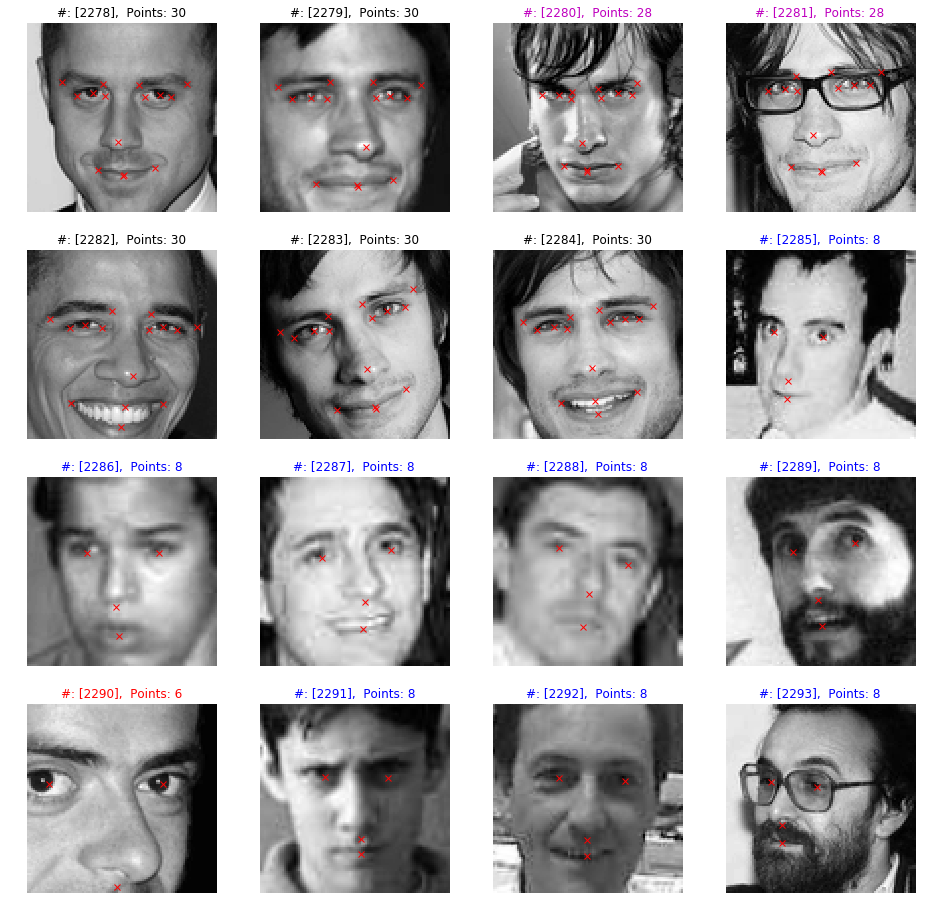

In [7]:
sample_group_split = 2278                        # sample few images around boundary of group1 and group2
group_1_2 = np.arange(sample_group_split, sample_group_split + 16)
plot_img_group( group_1_2 )

Below are arrays of image indices (approx. 320 total), split into two groups: - group1 images typically have 30 keypoints, while group2 images have typically 8 keypoints or less.

In [8]:
group1_audited = np.array( [67, 89, 129, 152, 242, 249, 256, 288, 334, 345, 391, 490, 580, 675,
                            693, 757, 774, 792, 1380, 500, 513, 539, 811, 840, 896, 981, 1195, 
                            1586, 1589, 1599, 1602, 1606, 1621, 1625, 1627, 1628, 1630, 1637, 
                            1644, 1647, 1648, 1655, 1676, 1679, 1680, 1685, 1686, 1688, 1694, 
                            1697, 1704, 1709, 1720, 1722, 1724, 1725, 1732, 1738, 1739, 1742, 
                            1741, 1745, 1748, 1760, 1780, 1782, 1783, 1787, 1796, 1798, 1820,
                            1824, 1828, 1835, 1838, 1840, 1841, 1862, 1867, 1875, 1877, 1878,
                            1882, 1897, 1913, 1920, 1921, 1926, 1927, 1931, 1935, 1939, 1940,
                            1943, 1947, 1957, 1958, 1967, 1968, 1973, 1980, 1986, 2011, 2015,
                            2024, 2027, 2037, 2040, 2041, 2061, 2064, 2076, 2078, 2087, 2089,
                            2091, 2100, 2109, 2096, 2099, 2101, 2102, 2113, 2116, 2126, 2128,
                            2131, 2136, 2137, 2138, 2142, 2145, 2146, 2149, 2150, 2154, 2155,
                            2156, 2162, 2171, 2174, 2176, 2179, 2187, 2189, 2195, 2200, 2203,
                            2206, 2207, 2209, 2215, 2217, 2224, 2228, 2234, 2238, 2240, 2245] )

group2_audited = np.array( [2290, 2321, 2322, 2332, 2349, 2358, 2359, 2376, 2397, 2408, 2414, 
                            2428, 2431, 2446, 2454, 2462, 2497, 2574, 2584, 2635, 2647, 2652, 
                            2654, 2663, 2671, 2691, 2694, 2715, 2765, 2787, 2830, 2871, 2910, 
                            2916, 2926, 3011, 3014, 3081, 3105, 3126, 3176, 3206, 3235, 3238,
                            3291, 3297, 3299, 3302, 3361, 3420, 3475, 3486, 3497, 3511, 3354, 
                            3910, 3915, 3940, 3976, 3990, 4016, 4061, 4063, 4181, 4198, 4264,
                            4303, 4339, 4416, 4430, 4477, 4483, 4484, 4491, 4494, 4507, 4655, 
                            4766, 4809, 4837, 4862, 4867, 4880, 4903, 4905, 4917, 4979, 4981, 
                            4992, 5056, 5068, 5098, 5118, 5168, 5179, 5226, 5246, 5362, 5498, 
                            5504, 5513, 5520, 5545, 5552, 5557, 5566, 5597, 5607, 5611, 5623,
                            5628, 5640, 5653, 5750, 5796, 5849, 5868, 5929, 6128, 6130, 6149, 
                            6260, 6268, 6316, 6323, 6332, 6343, 6386, 6406, 6418, 6452, 6490, 
                            6493, 6494, 6535, 6538, 6575, 6586, 6588, 6605, 6659, 6708, 6714, 
                            6724, 6733, 6753, 6754, 6755, 6758, 6761, 6766, 6783, 6811, 6810,
                            6821, 6855, 6856, 6860, 6890, 6904, 6907, 7024, 7027, ] )

joint_audited = np.append( group1_audited, group2_audited )
print(" Total images to audit in group 1 and 2 combined: ", joint_audited.shape[0] )

 Total images to audit in group 1 and 2 combined:  322


The above two groups of images are plotted below. From these, those that need to be necessarily dropped out of the dataset, need to be identified. Some overall pecularities are critiqued below:

#### Group1:

##### Eyes closed: 
for identifying the center of eye keypoint, these images just have approximate label of that keypoint, without providing a high level of feature extraction for the model e.g. the contrast between cornea and eyeball and the whole eye. But since the dataset has more than 300+ such images, these probably are common in the test dataset (an educated guess) and hence should not be ruled out from training dataset. Examples: 152, 288, 1676

##### Partially/fully covered keypoints:
These images have section around the eyes partially covered with hairs, hat etc. or other facial sections obstructed by various objects, props, sunglassed or face is partially in dark shadow; and are again approximating the obscured keypoint. The concern is whether this provides any real feature to extract for the model or not. Maybe we should train the model with and without these images and see how the loss function behaves. 
Examples: 1655, 1697, 5628

##### A second partial/full face:
Some images have more than one face either partially or fully appearing in the foreground/background. Although some fo these are labelled correctly, this can probably mislead the model, especially in cases there more than face is having keypoints. These should most likely be dropped from the train dataset. 
Exanples: 1820, 2064, 4491

#### Group2:

##### Highly blurred:
Group 2 has much higher share of images that are highly blurred out to provide any significant feature extractions. These may not be useful for training the model at all. 
Examples: 2574, 2916, 6605

#### Common to both groups:

##### Wrong/bad labels:
These images outright have wrong labelling and should be removed from the train dataset. 
Examples: 1748, 1878, 6493

##### Missing keypoints:
Most of such images e.g. with only 28 or 26 keypoints for group1, and, 6 or 4 keypoints for group2 are either out of frame, or have the face viewed sideways, or overshadowed and hence aren't able to capture/specify all keypoints, but nevertheless are quite valid for training.

These should however adhere the either of the two groups - 1 or 2, and be used only for training that particular model.
Examples: 1709, 1875, 2322

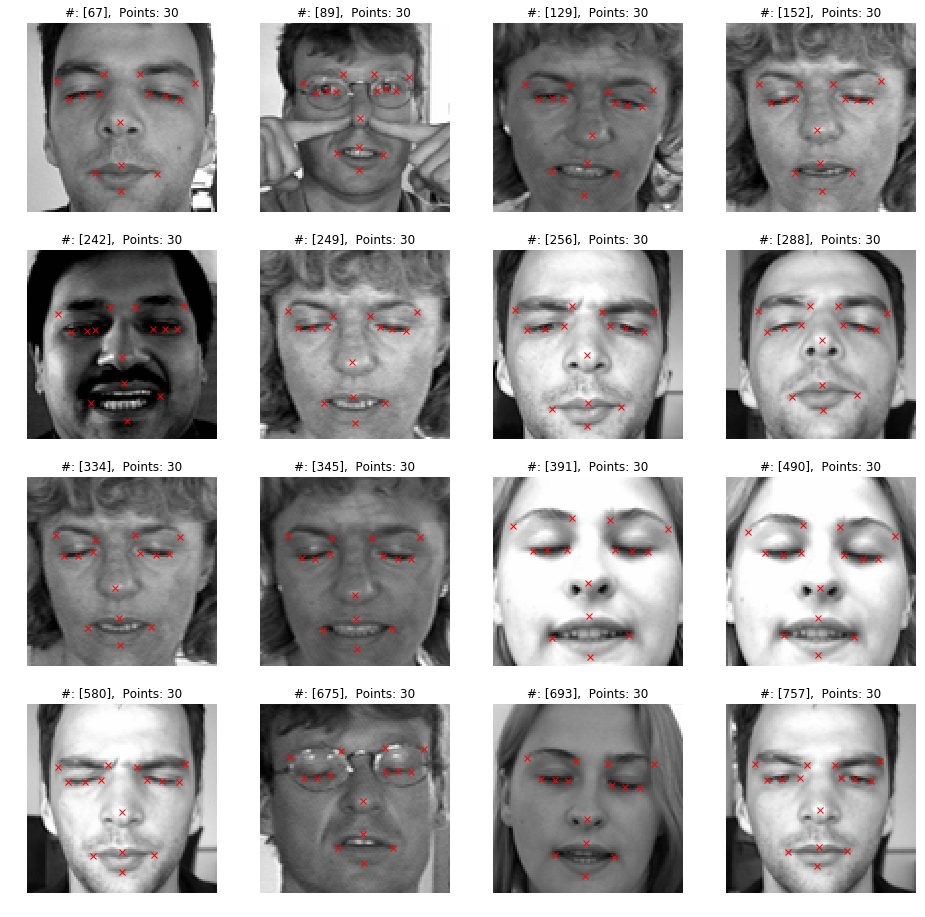

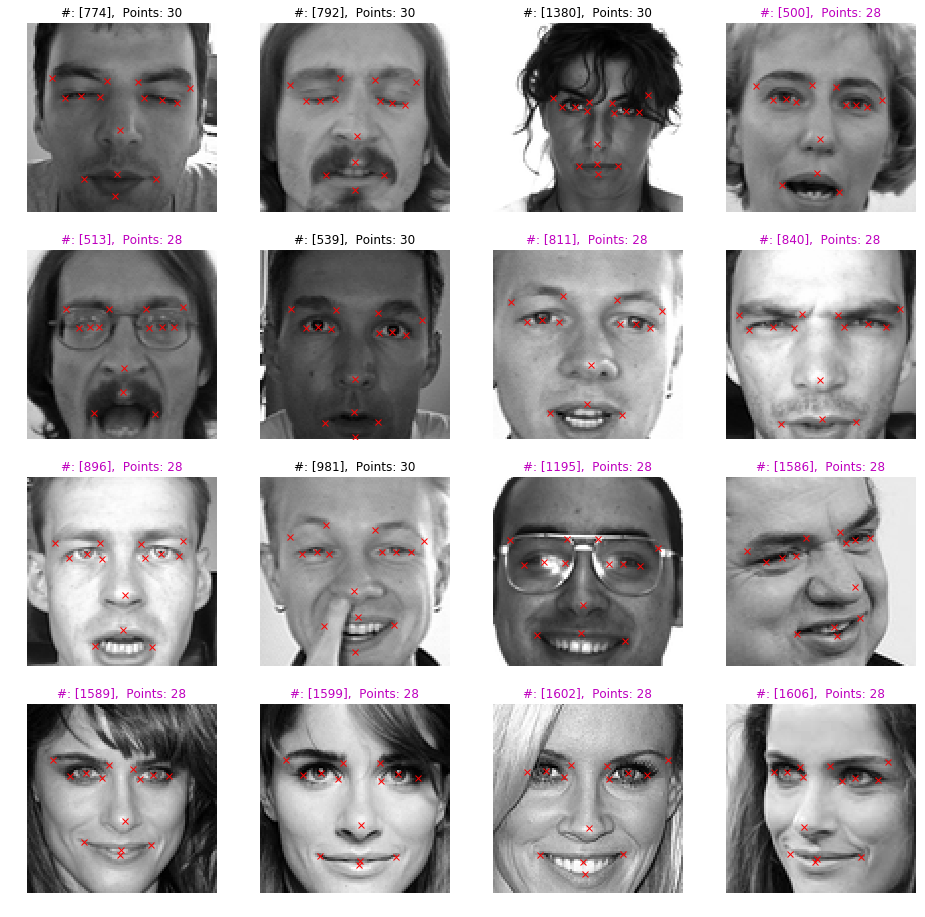

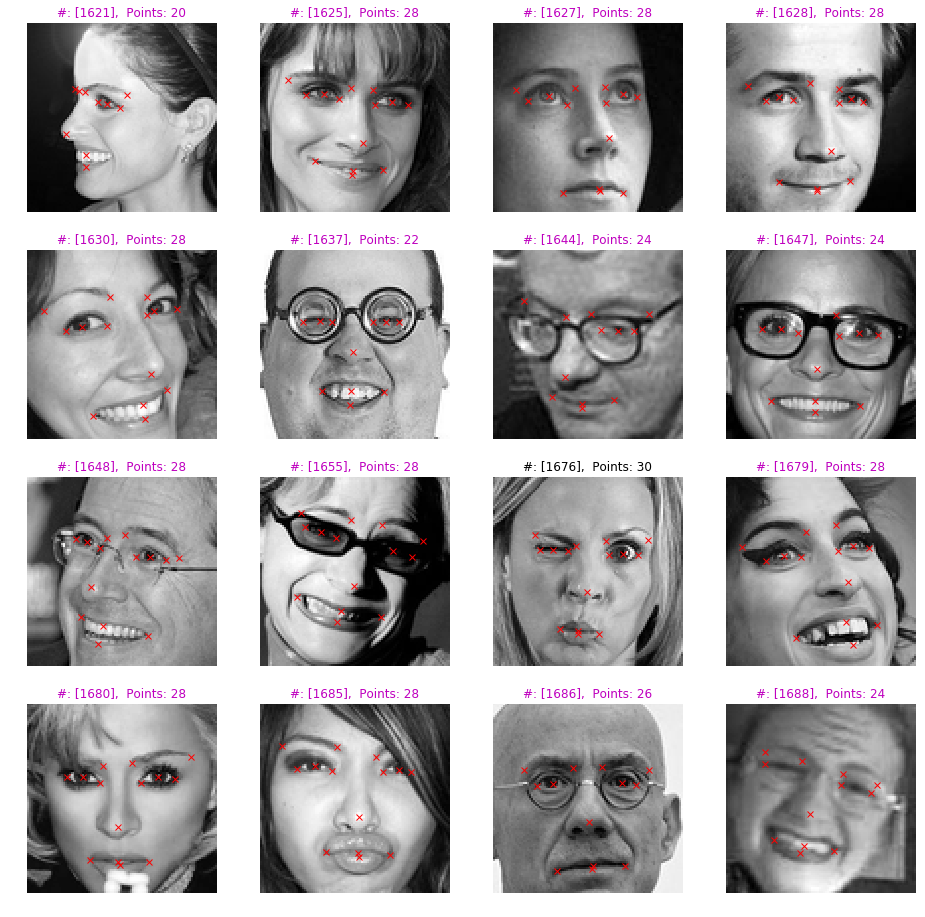

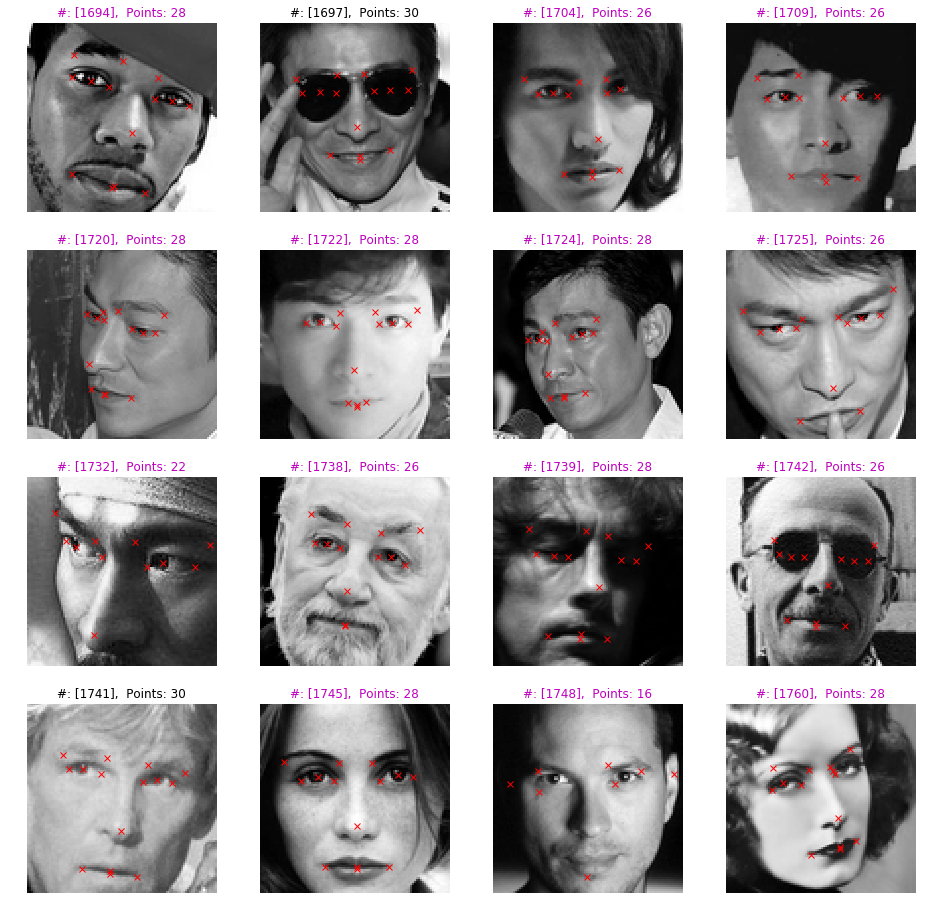

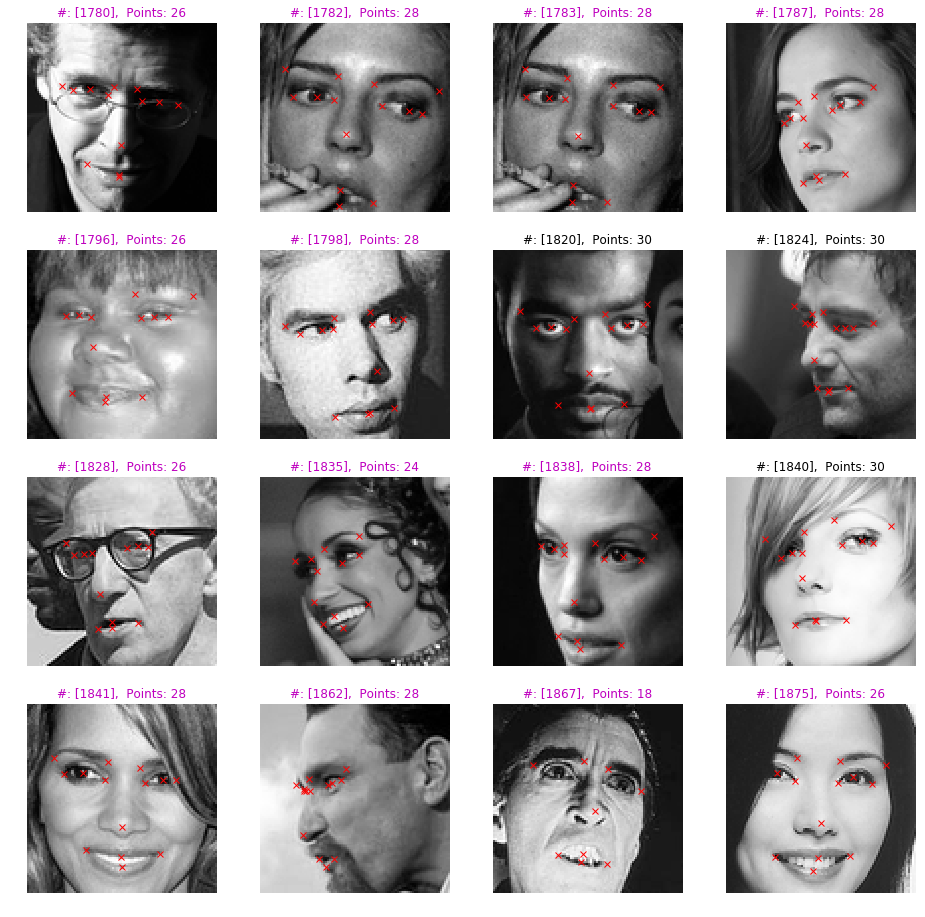

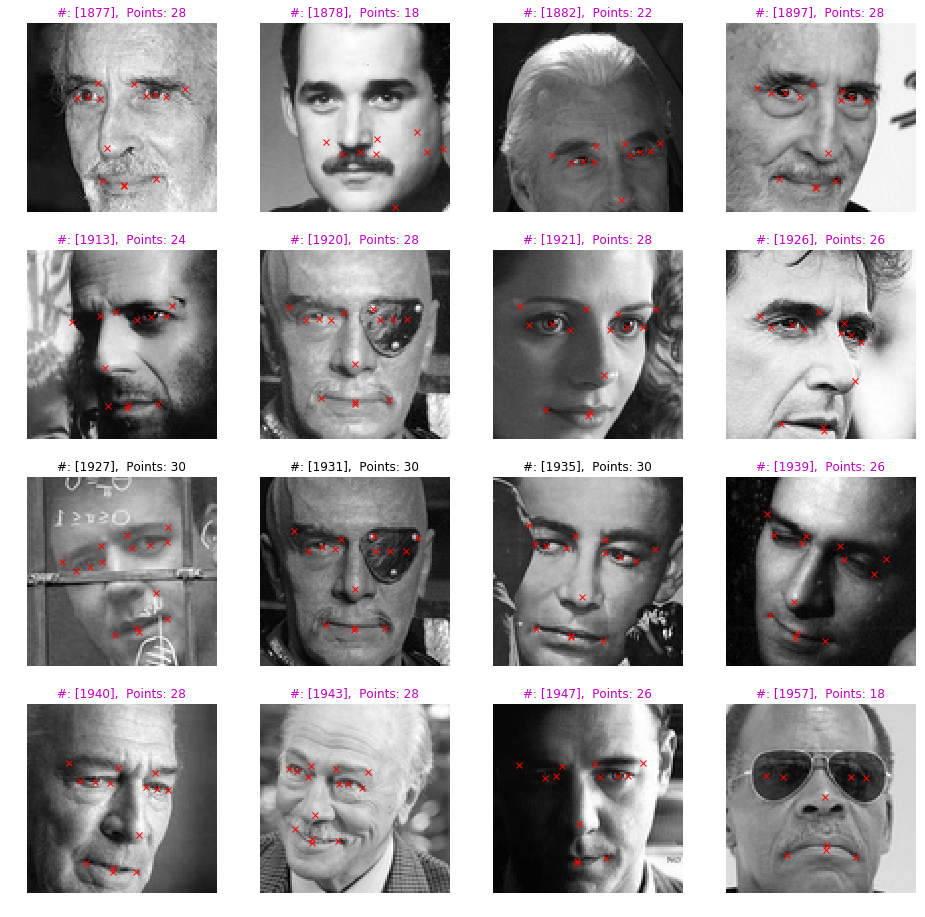

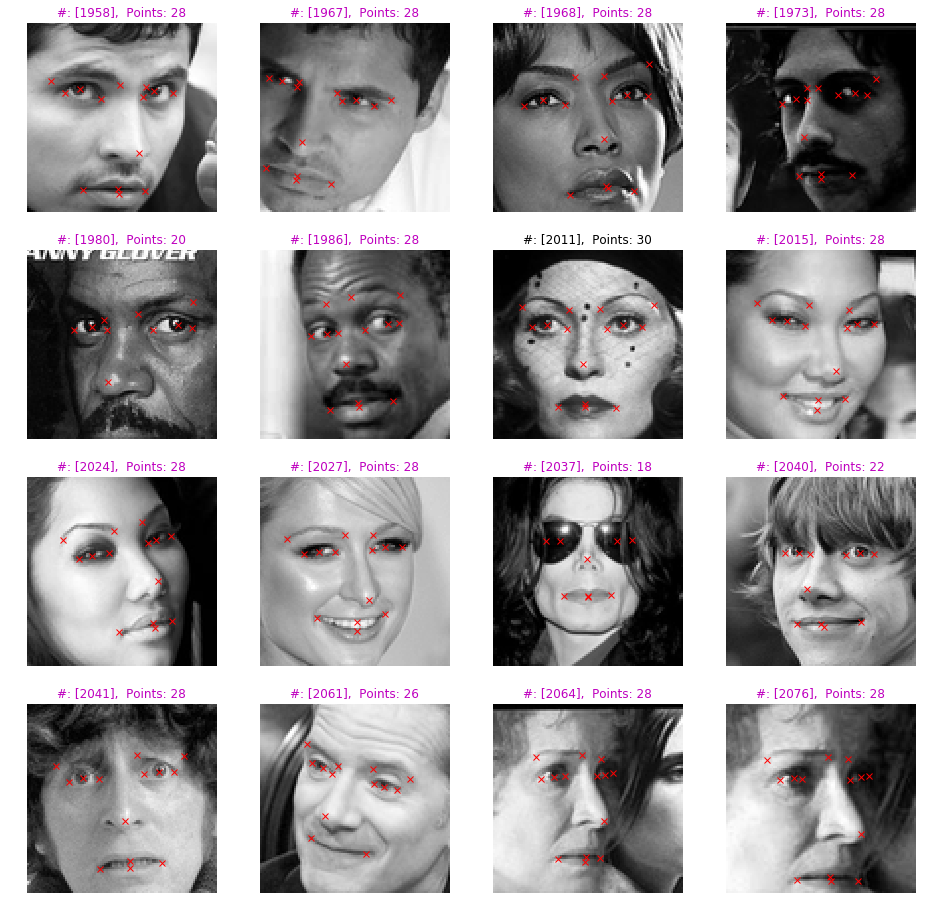

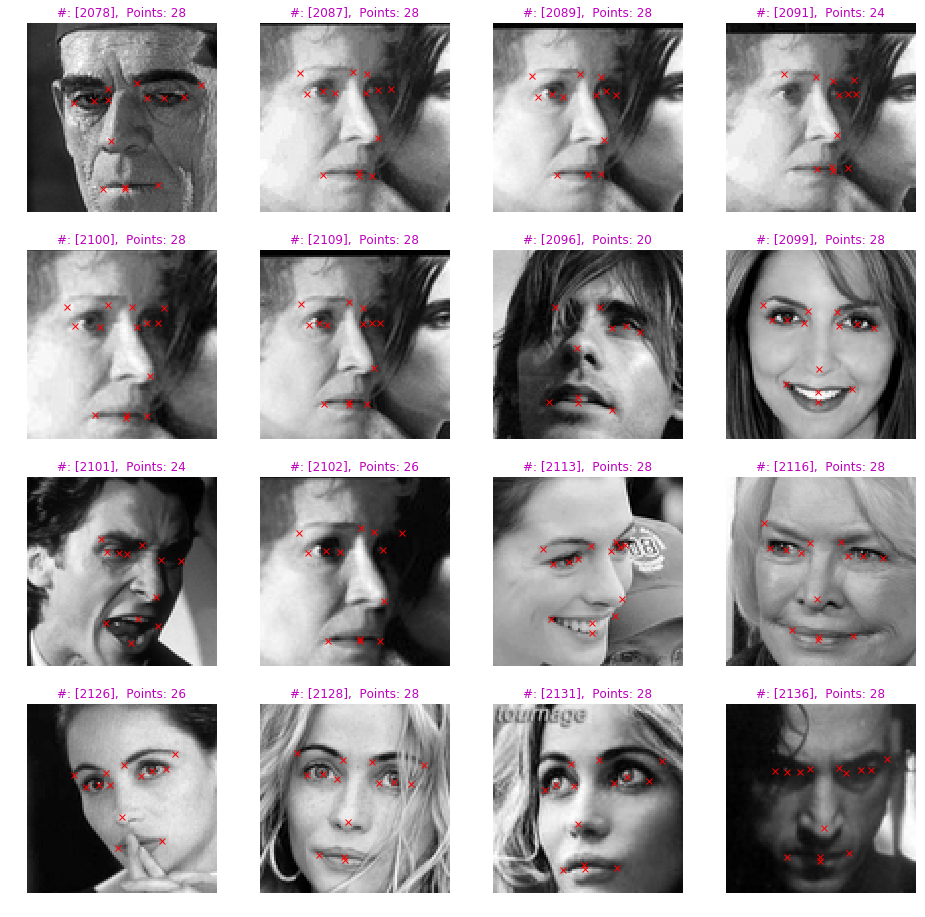

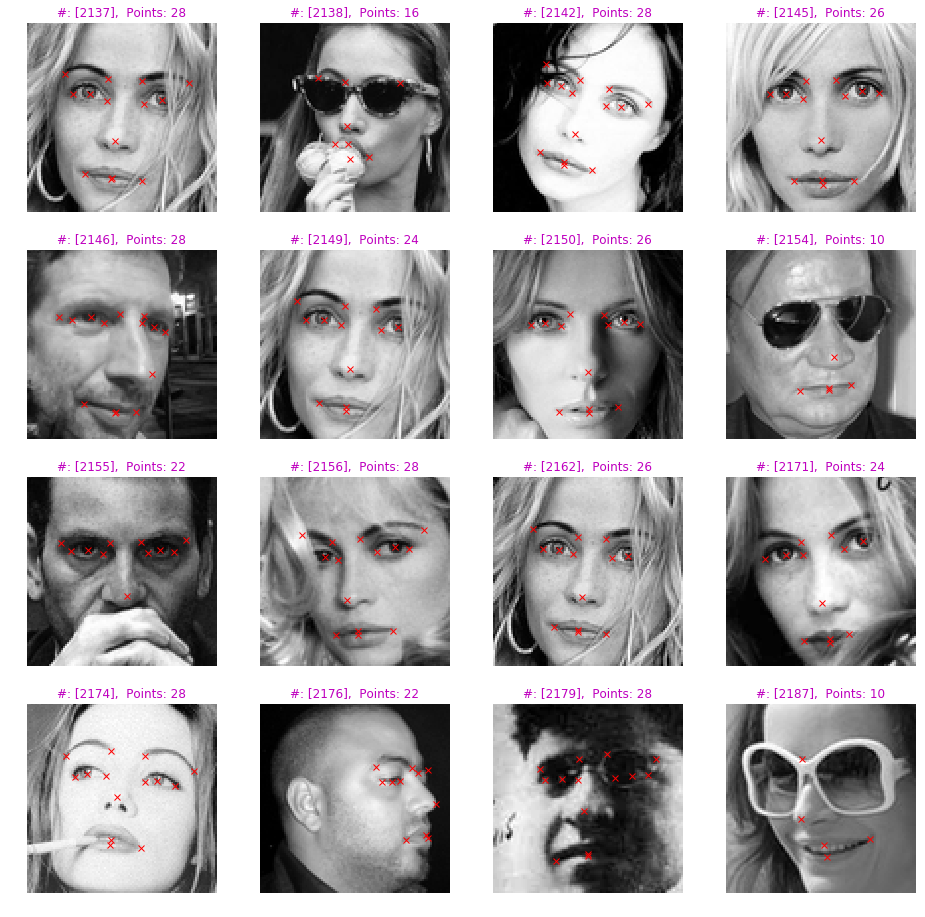

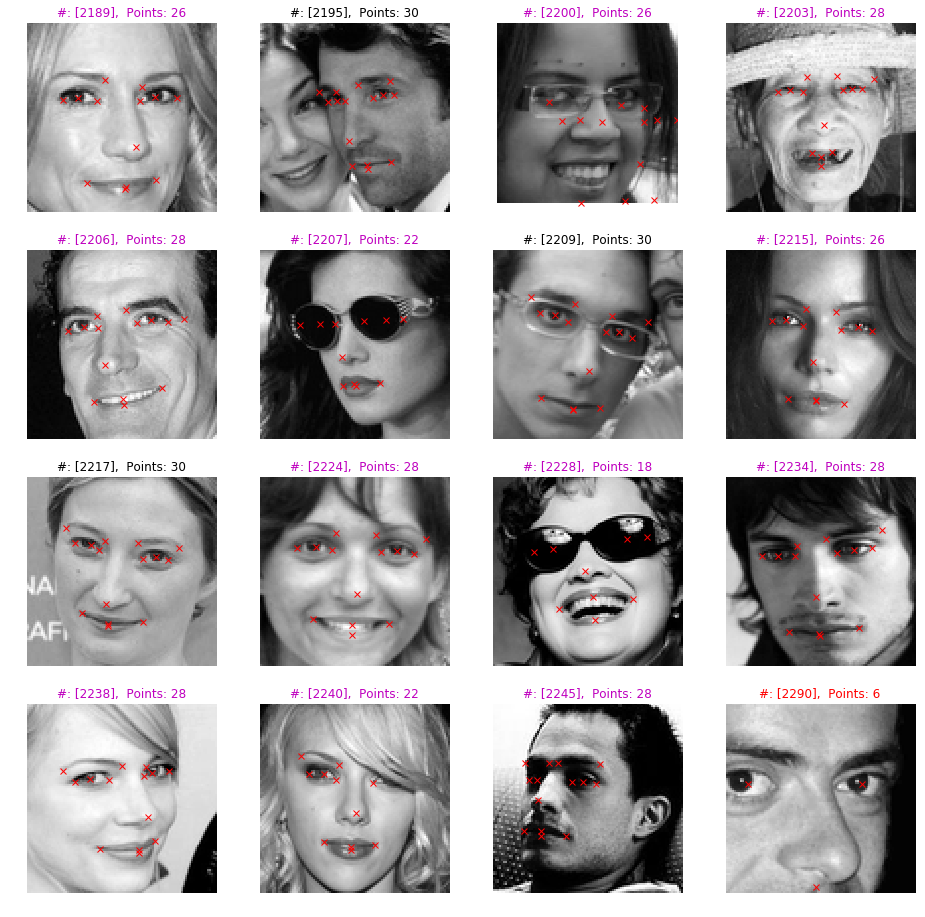

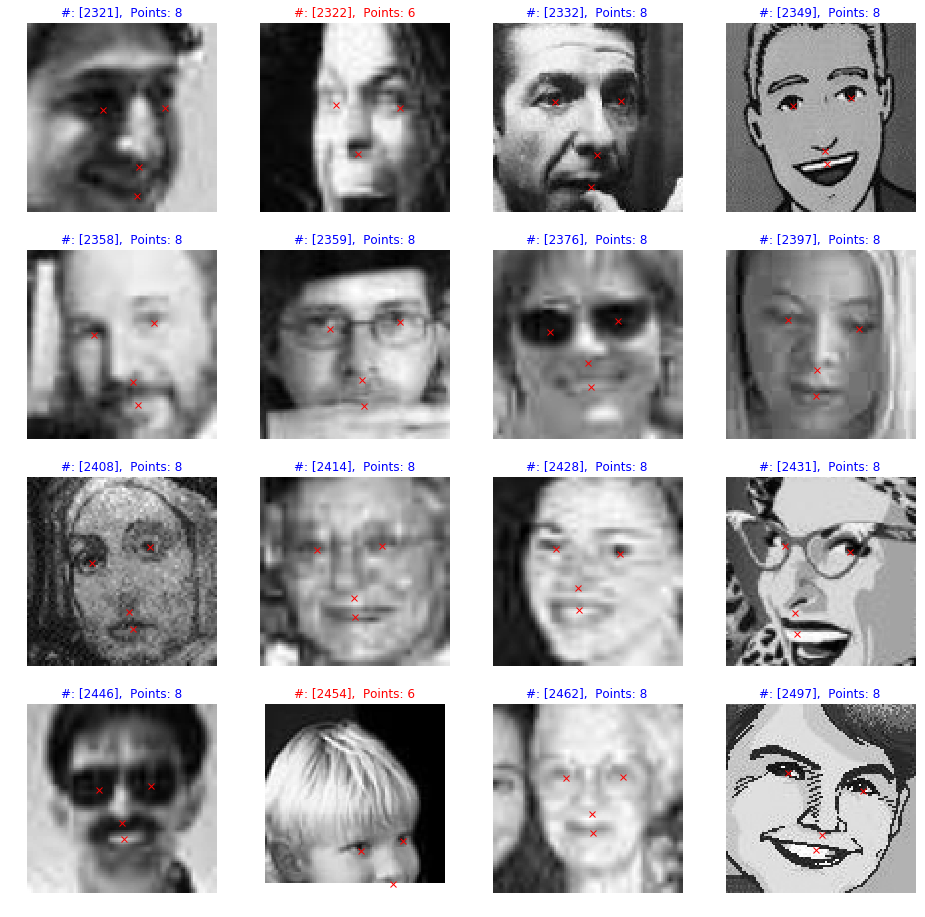

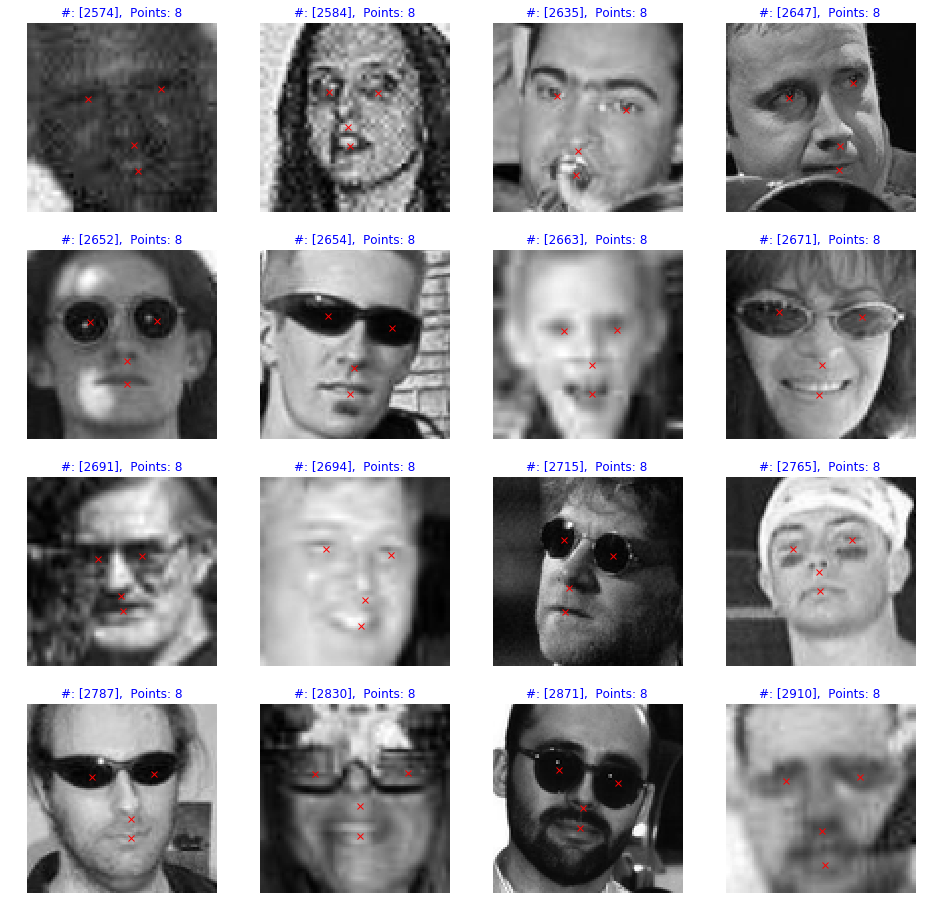

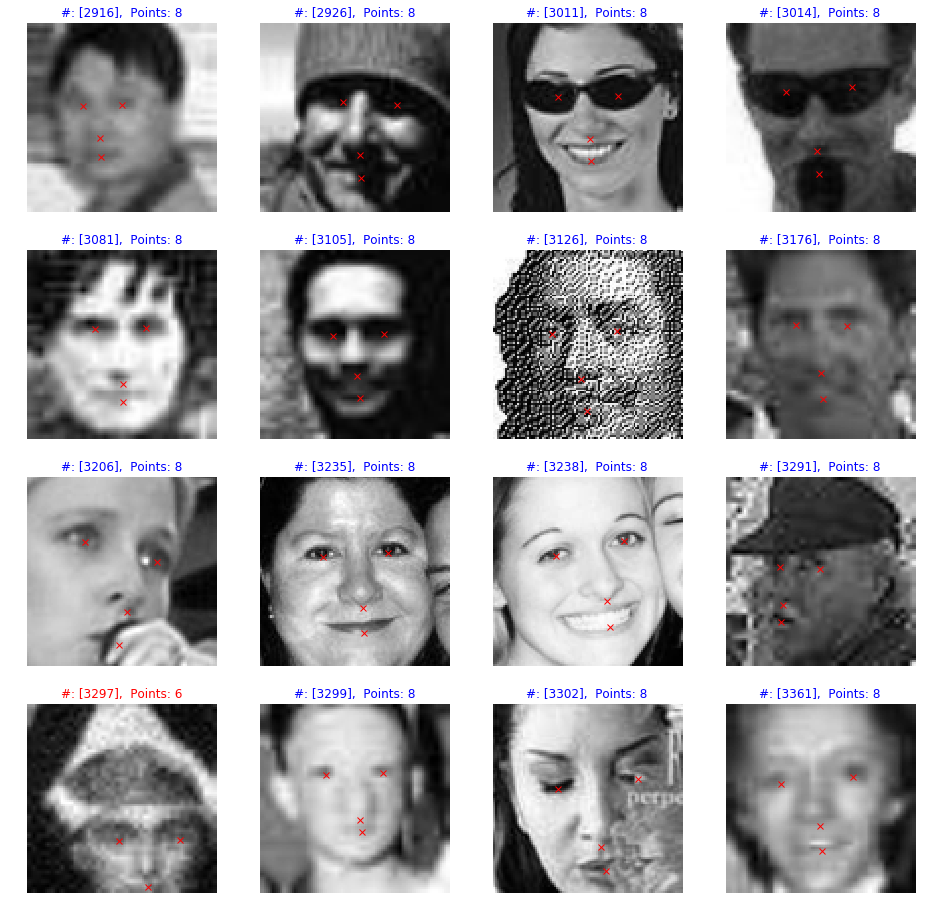

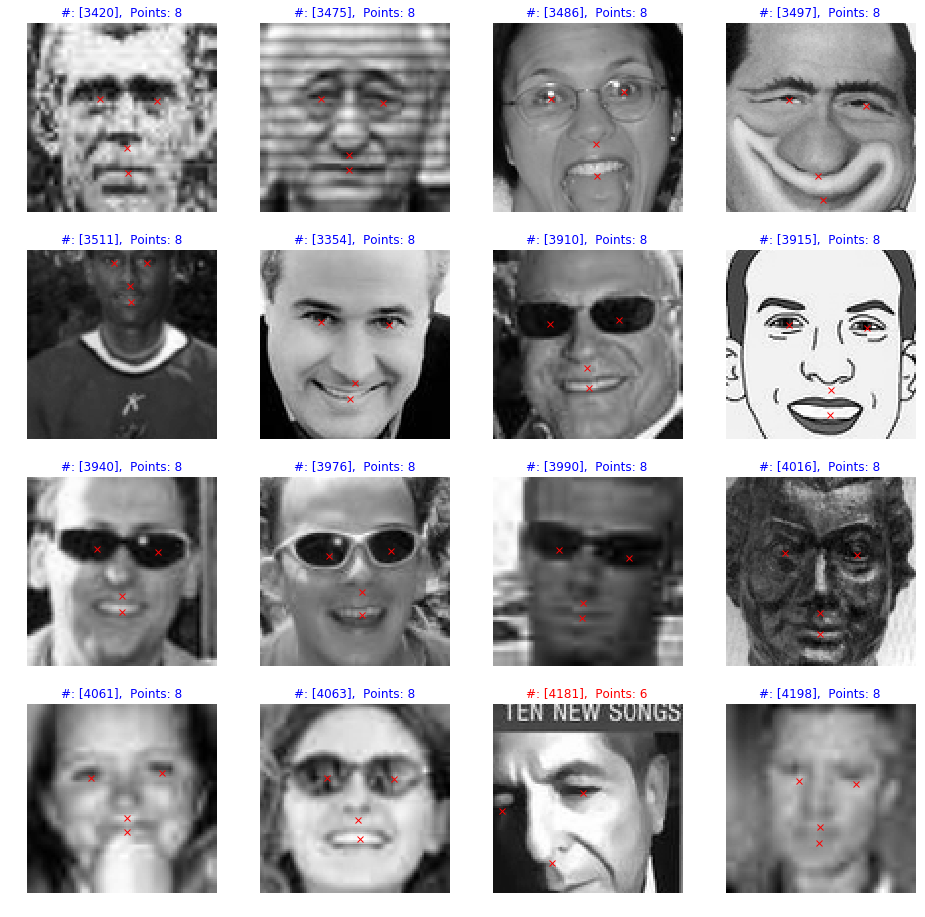

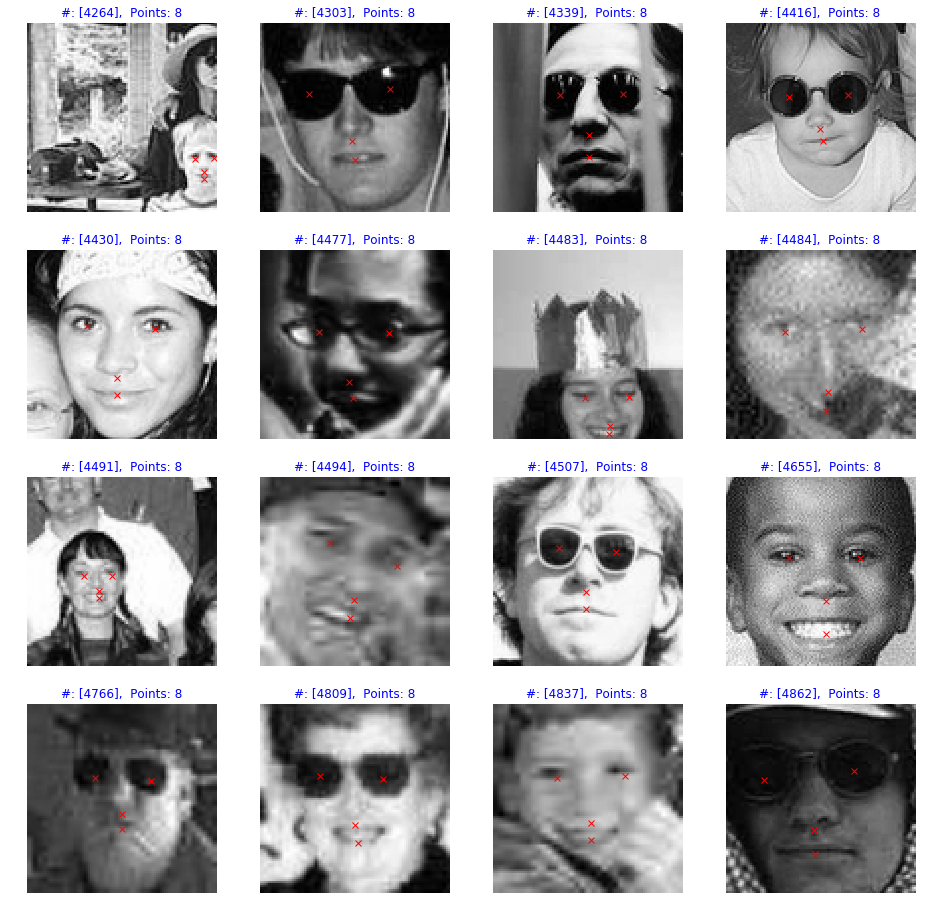

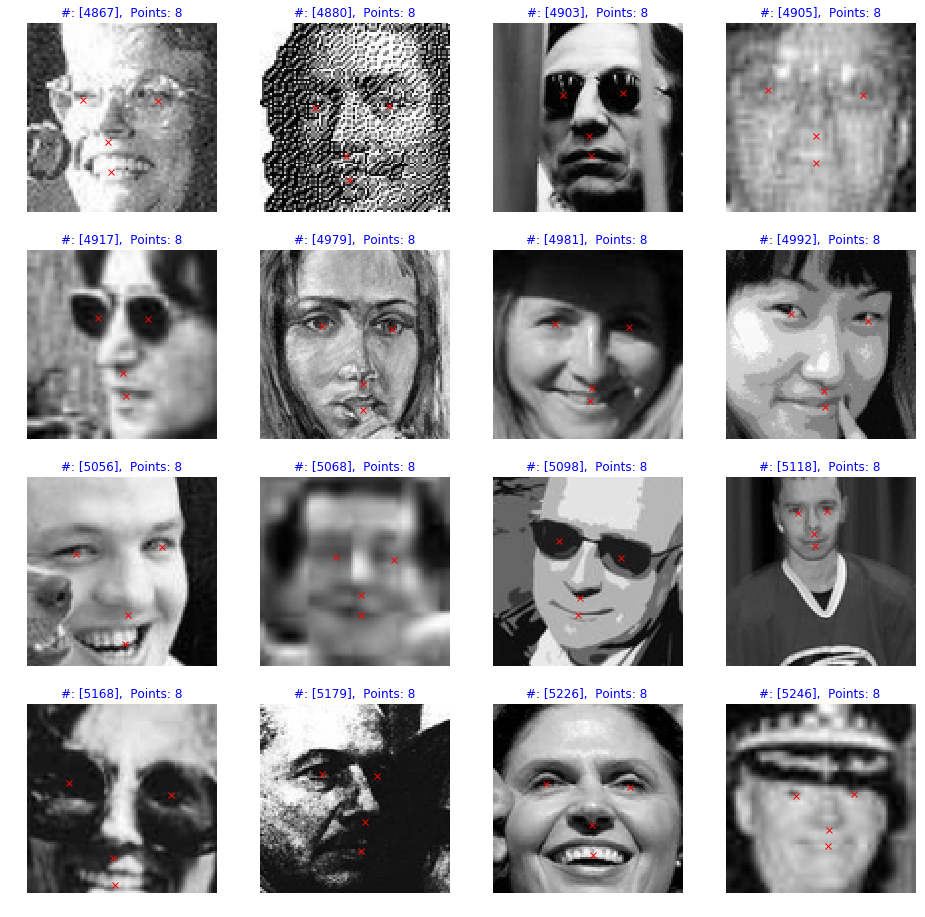

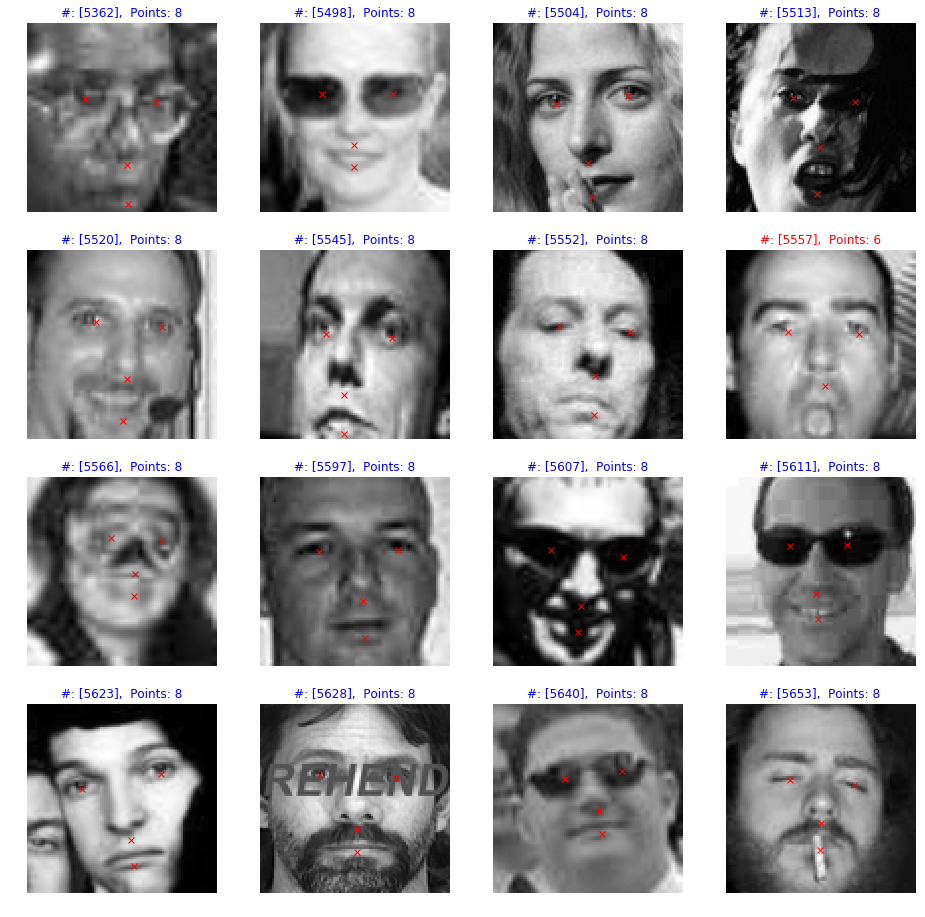

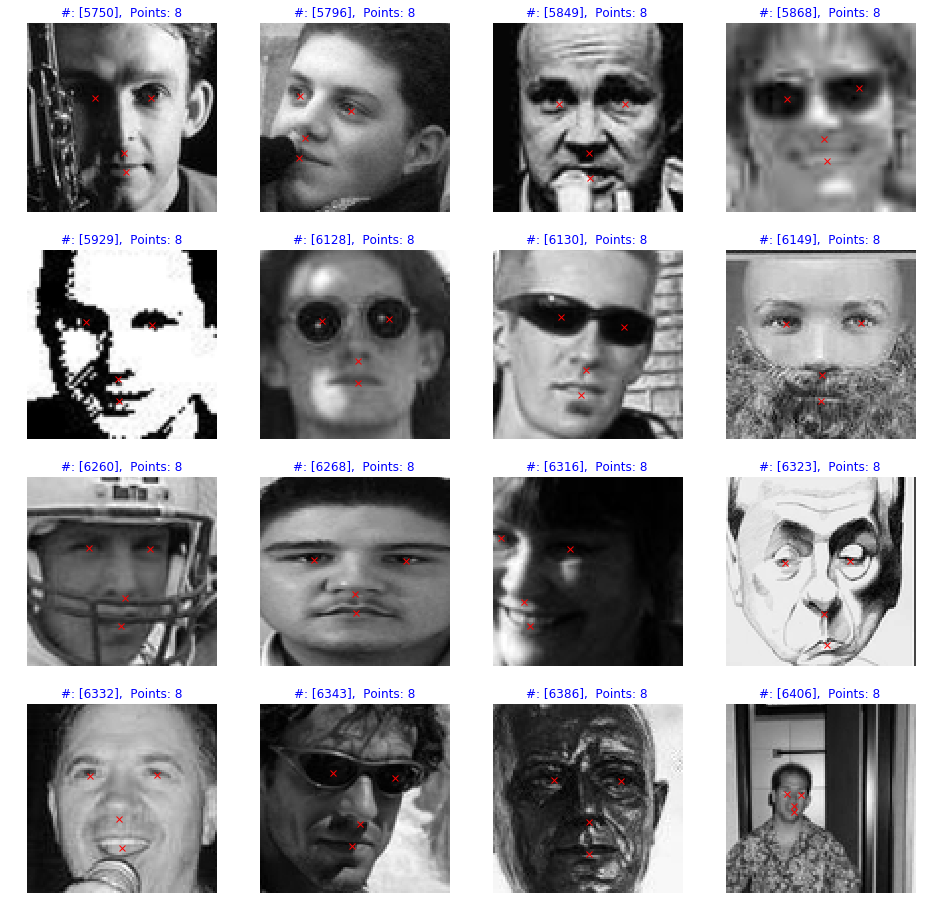

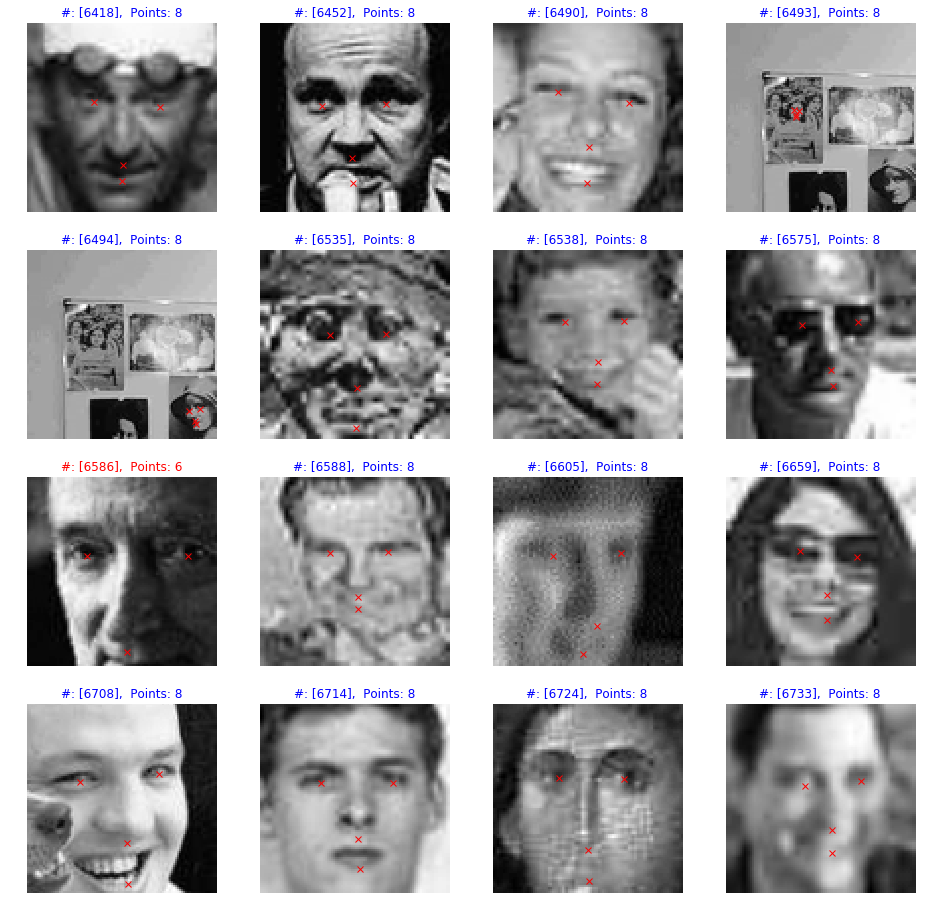

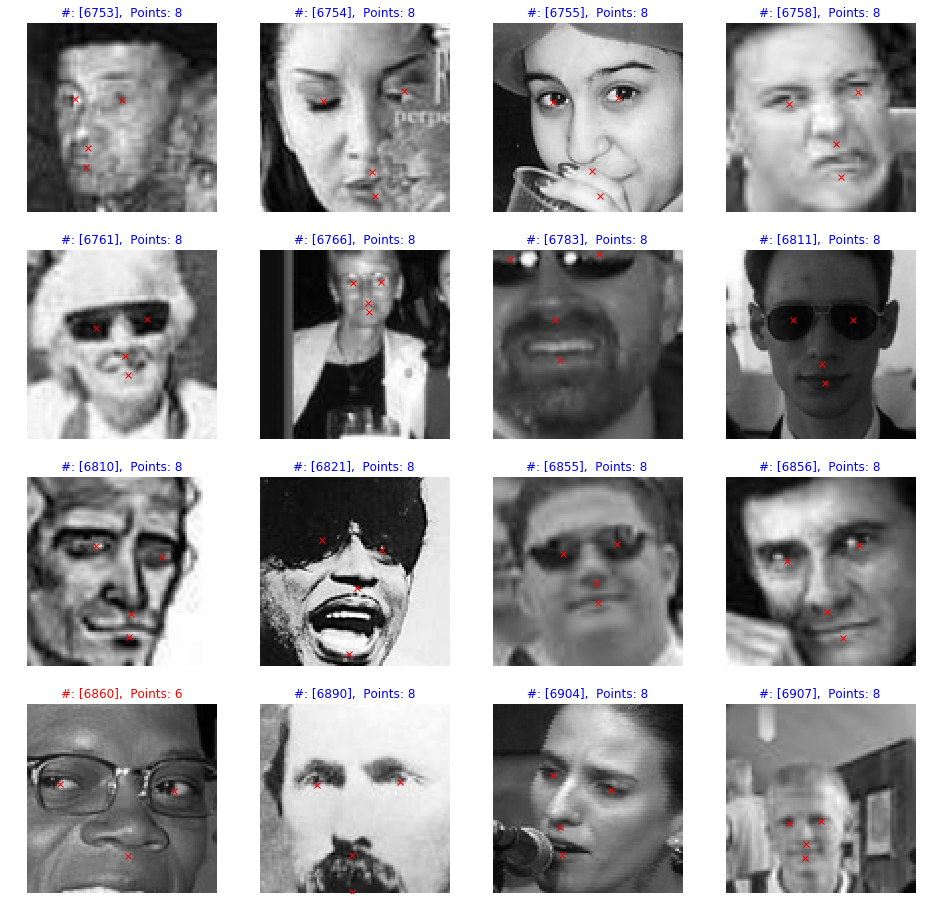

In [9]:
plot_img_group( joint_audited )

Final indices of images to be dropped from the dataset

In [10]:
dropped_imdices = np.array( [ ])